In [1]:
import pandas as pd
import datetime
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
df = pd.read_csv('stage3Clean.csv')
print(df)

        incident_id       date           state city_or_county  \
0            461105   1/1/2013    Pennsylvania     Mckeesport   
1            460726   1/1/2013      California      Hawthorne   
2            478855   1/1/2013            Ohio         Lorain   
3            478925   1/5/2013        Colorado         Aurora   
4            478959   1/7/2013  North Carolina     Greensboro   
...             ...        ...             ...            ...   
239672      1083142  3/31/2018       Louisiana          Rayne   
239673      1083139  3/31/2018       Louisiana   Natchitoches   
239674      1083151  3/31/2018       Louisiana         Gretna   
239675      1082514  3/31/2018           Texas        Houston   
239676      1081940  3/31/2018           Maine   Norridgewock   

                                          address  n_killed  n_injured  \
0       1506 Versailles Avenue and Coursin Street         0          4   
1                    13500 block of Cerise Avenue         1          3 

In [2]:
cleanDF = df.drop(['incident_id', 'incident_url','source_url','incident_url_fields_missing', 'notes', 'participant_name','participant_relationship', 'participant_status',
       'participant_type', 'sources','address','congressional_district','gun_stolen','gun_type','incident_characteristics','latitude','location_description','longitude','n_guns_involved','participant_age','participant_age_group','participant_gender','state_house_district','state_senate_district'], axis = 1)

In [3]:
cleanDF.state.value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [4]:
cleanDF.head()

,date,state,city_or_county,n_killed,n_injured
0,1/1/2013,Pennsylvania,Mckeesport,0,4
1,1/1/2013,California,Hawthorne,1,3
2,1/1/2013,Ohio,Lorain,1,3
3,1/5/2013,Colorado,Aurora,4,0
4,1/7/2013,North Carolina,Greensboro,2,2


In [5]:
cleanDF.isnull().head()
#True means missing values exists

,date,state,city_or_county,n_killed,n_injured
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


Text(0.5, 1.0, 'Fatalities by states from 2013 - 2018')

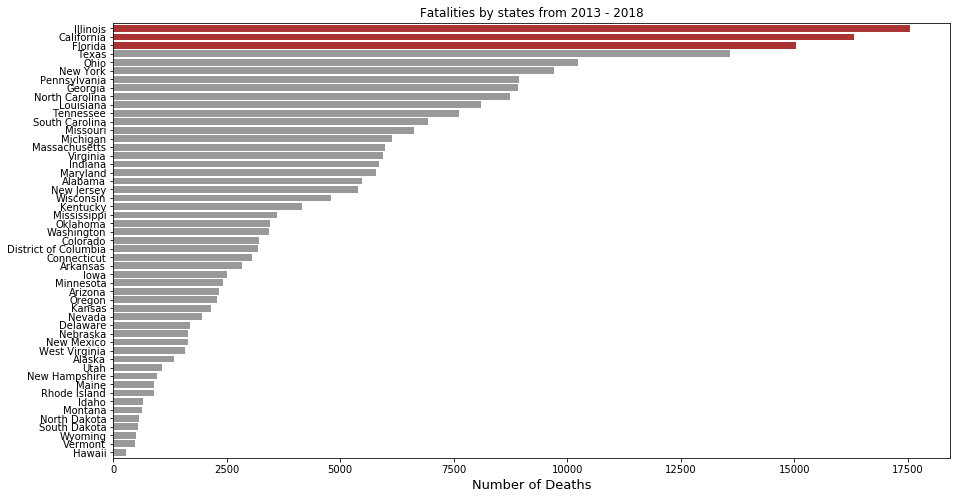

In [6]:
plt.xlabel('Number of Deaths',fontsize = 13)
df= cleanDF.state.value_counts(ascending=True)

ax = df.plot(kind='barh', figsize=(15,8),width=0.8, legend=False)

for bar in ax.patches:
    bar.set_facecolor('#999999')
    
highlight1 = 'Illinois'
highlight2 = 'Florida'
highlight3 = 'California'

pos1 = df.index.get_loc(highlight1)
pos2 = df.index.get_loc(highlight2)
pos3 = df.index.get_loc(highlight3)

ax.patches[pos1].set_facecolor('#aa3333')
ax.patches[pos2].set_facecolor('#aa3333')
ax.patches[pos3].set_facecolor('#aa3333')

plt.title('Fatalities by states from 2013 - 2018')


In [7]:
#Cities that affected most with GV
city_counts = cleanDF.city_or_county.value_counts().head()
city_counts

Chicago         10814
Baltimore        3943
Washington       3279
New Orleans      3071
Philadelphia     2963
Name: city_or_county, dtype: int64

In [8]:
#By City - need to plot top 3 cities 
city_counts.describe()

count        5.000000
mean      4814.000000
std       3375.615351
min       2963.000000
25%       3071.000000
50%       3279.000000
75%       3943.000000
max      10814.000000
Name: city_or_county, dtype: float64

0         1
1         1
2         1
3         1
4         1
         ..
239672    3
239673    3
239674    3
239675    3
239676    3
Name: date, Length: 239677, dtype: int64


,index,date,state,city_or_county,n_killed,n_injured,month_date,year,month_year
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,1,2013,1-2013
1,1,1/1/2013,California,Hawthorne,1,3,1,2013,1-2013
2,2,1/1/2013,Ohio,Lorain,1,3,1,2013,1-2013
3,3,1/5/2013,Colorado,Aurora,4,0,1,2013,1-2013
4,4,1/7/2013,North Carolina,Greensboro,2,2,1,2013,1-2013
5,5,1/7/2013,Oklahoma,Tulsa,4,0,1,2013,1-2013
6,6,1/19/2013,New Mexico,Albuquerque,5,0,1,2013,1-2013
7,7,1/21/2013,Louisiana,New Orleans,0,5,1,2013,1-2013
8,8,1/21/2013,California,Brentwood,0,4,1,2013,1-2013
9,9,1/23/2013,Maryland,Baltimore,1,6,1,2013,1-2013


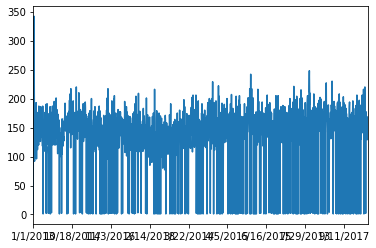

In [9]:
cleanDF.date.value_counts().sort_index().plot()
from datetime import datetime
print((pd.to_datetime(cleanDF['date']).dt.month))
cleanDF['month_date']= ((pd.to_datetime(cleanDF['date']).dt.month))
cleanDF['year']= ((pd.to_datetime(cleanDF['date']).dt.year))
cleanDF['month_year']= cleanDF['month_date'].astype(str) + "-" + cleanDF['year'].astype(str) 
cleanDF.reset_index()


In [10]:
# plot by n_killed vs date for frequency of distribution for the range of last 3 year or aggregate for top 3 cities
topStates = ['']
topStates = cleanDF.loc[:,('month_year','state', 'city_or_county', 'n_killed')]
topStates.head()


,month_year,state,city_or_county,n_killed
0,1-2013,Pennsylvania,Mckeesport,0
1,1-2013,California,Hawthorne,1
2,1-2013,Ohio,Lorain,1
3,1-2013,Colorado,Aurora,4
4,1-2013,North Carolina,Greensboro,2


In [11]:
topStates.tail()

,month_year,state,city_or_county,n_killed
239672,3-2018,Louisiana,Rayne,0
239673,3-2018,Louisiana,Natchitoches,1
239674,3-2018,Louisiana,Gretna,0
239675,3-2018,Texas,Houston,1
239676,3-2018,Maine,Norridgewock,2


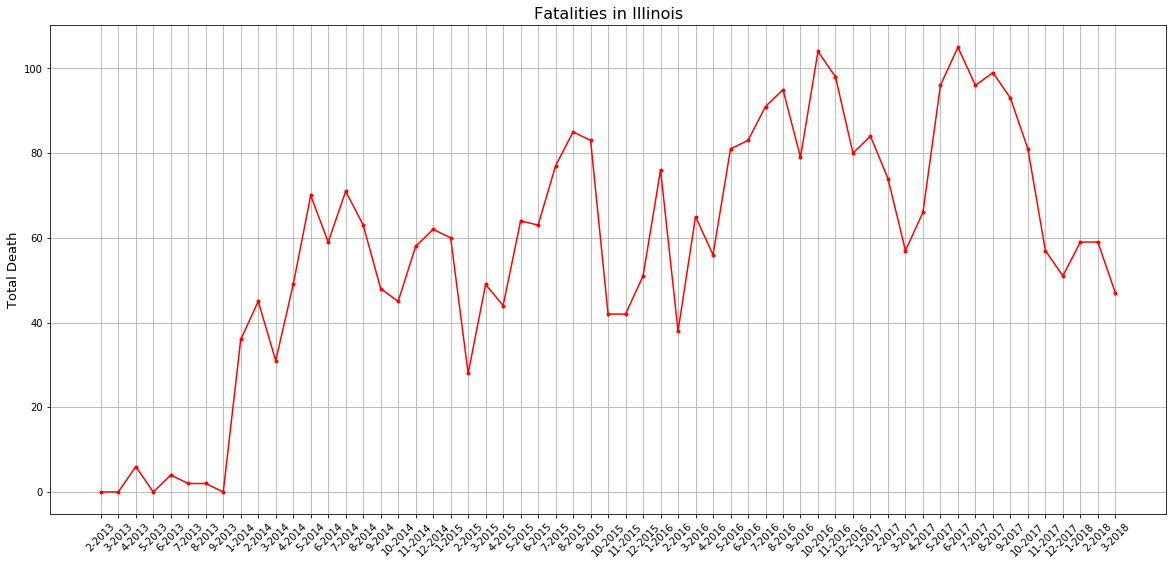

In [12]:

State =['Illinois']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Illinois', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
topStates.loc[topStates.state.isin(State)].groupby('month_year').sum()
plt.plot(topStates.loc[topStates.state.isin(State)].groupby('month_year',sort = False).sum(),color='r', marker='.')

plt.xticks(rotation = 45)
plt.grid(True)

plt.show()
plt.style.use('grayscale')

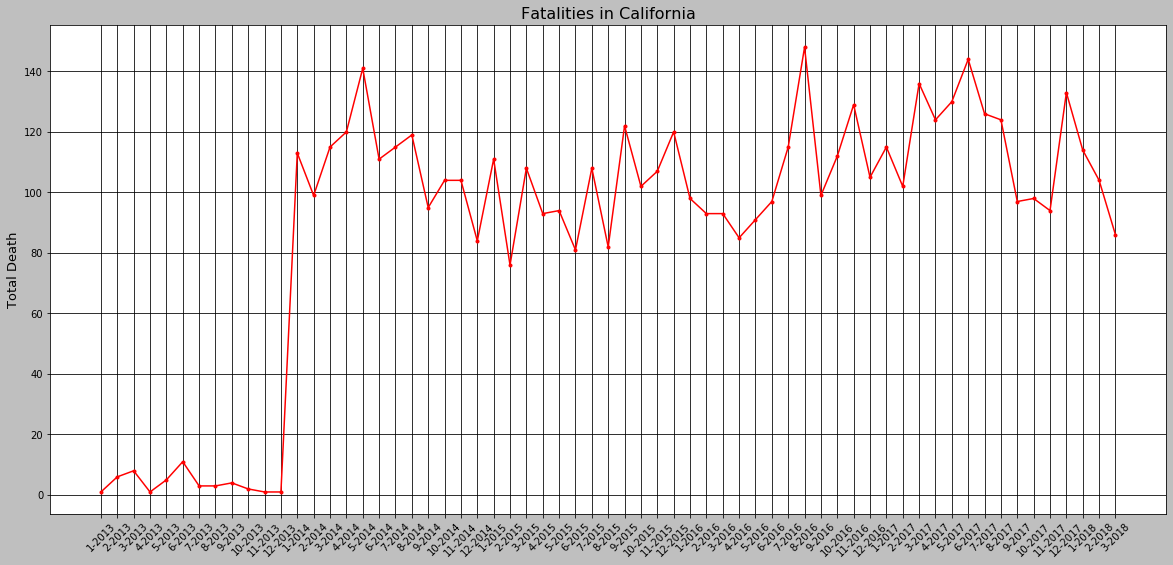

In [13]:

State =['California']
plt.figure(figsize = [20,9])
plt.title('Fatalities in California', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
topStates.loc[topStates.state.isin(State)].groupby('month_year').sum()
plt.plot(topStates.loc[topStates.state.isin(State)].groupby('month_year',sort = False).sum(), color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

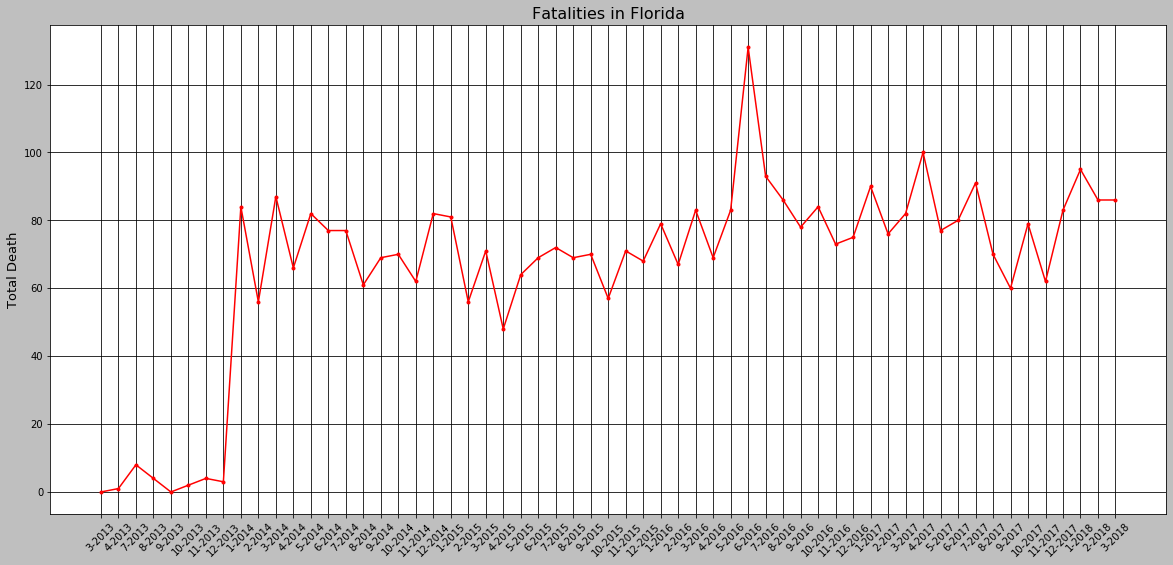

In [14]:

State =['Florida']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Florida', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
topStates.loc[topStates.state.isin(State)].groupby('month_year').sum()
plt.plot(topStates.loc[topStates.state.isin(State)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

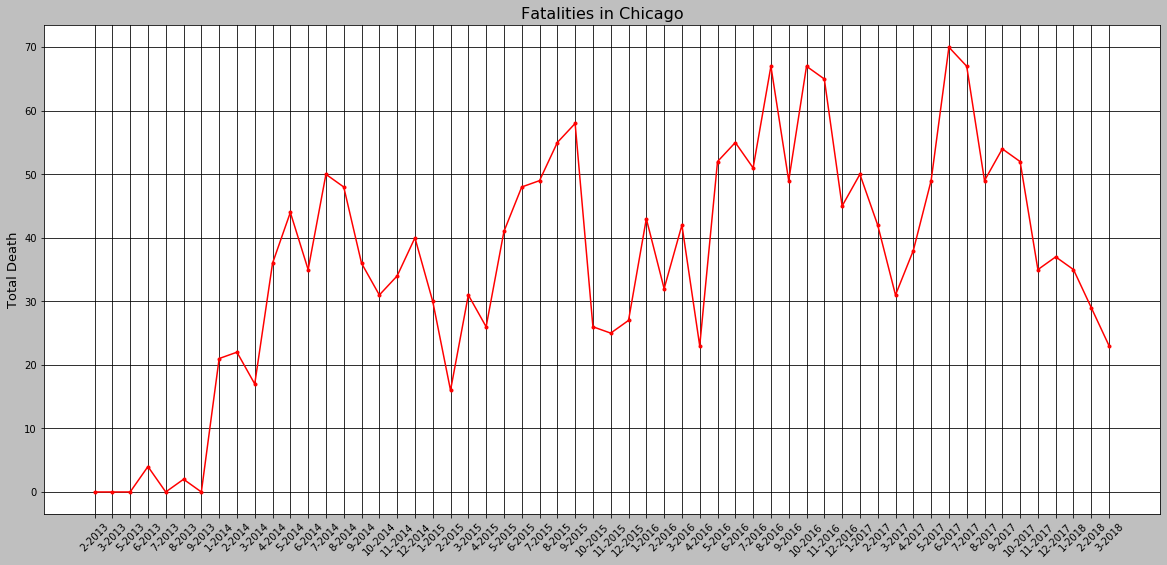

In [15]:

City =['Chicago']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Chicago', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(topStates.loc[topStates.city_or_county.isin(City)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

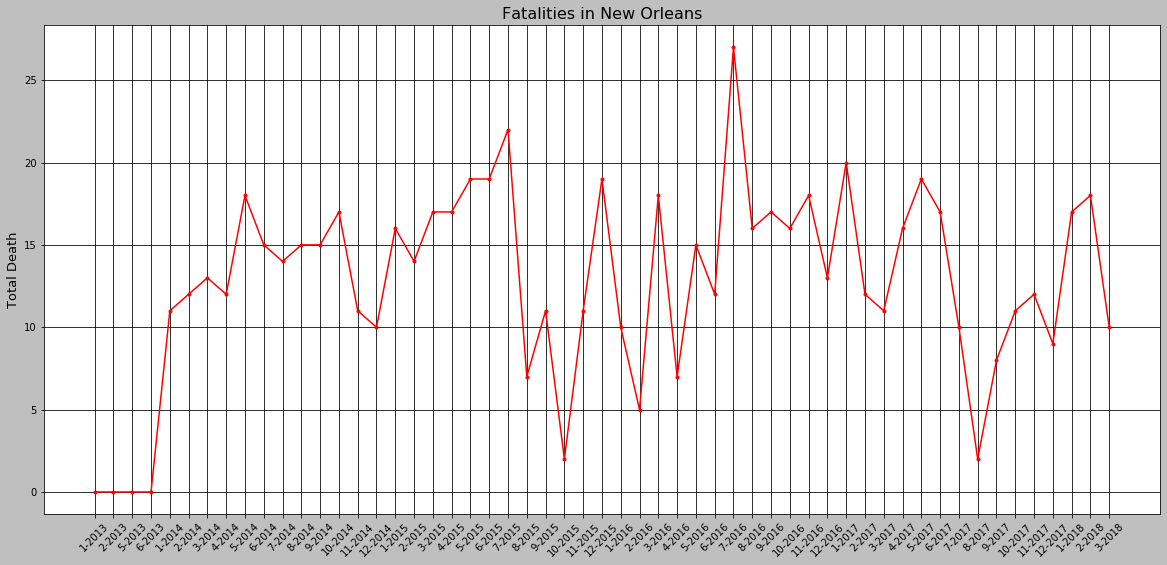

In [16]:

City =['New Orleans']
plt.figure(figsize = [20,9])
plt.title('Fatalities in New Orleans', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(topStates.loc[topStates.city_or_county.isin(City)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

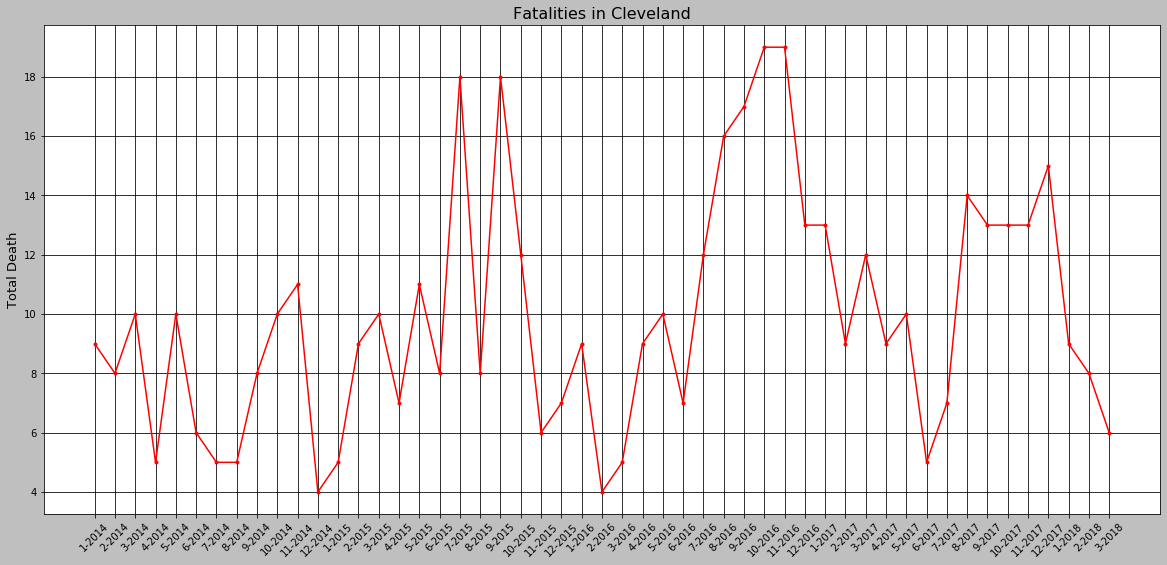

In [17]:

City =['Cleveland']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Cleveland', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(topStates.loc[topStates.city_or_county.isin(City)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

In [18]:
CitiesDF = pd.read_csv('Cities_DF.csv')
Year = CitiesDF['month_year']
Cleveland_City_DF = CitiesDF['cleveland']
Chicago_City_DF = CitiesDF['chicago']
New_Orleans_City_DF = CitiesDF['New Orleans']

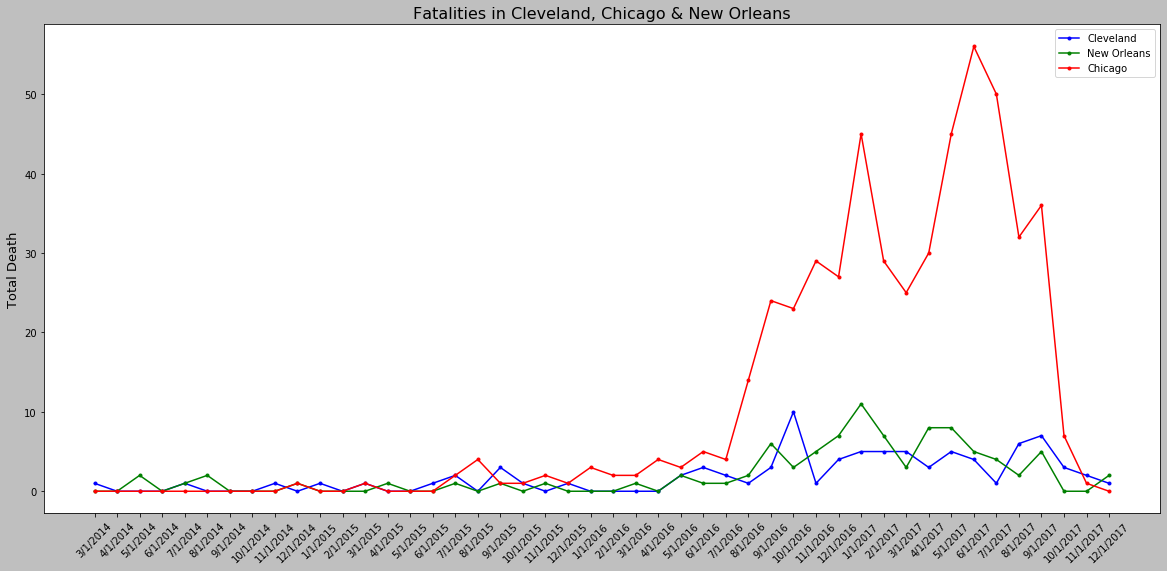

In [19]:
plt.figure(figsize = [20,9])
plt.title('Fatalities in Cleveland, Chicago & New Orleans', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(Year,Cleveland_City_DF,color='b',label = 'Cleveland', marker='.')
plt.plot(Year,New_Orleans_City_DF,color='g',label = 'New Orleans', marker='.')
plt.plot(Year,Chicago_City_DF,color='r',label = 'Chicago', marker='.')
plt.xticks(rotation = 45)
plt.legend()
plt.style.use('grayscale')

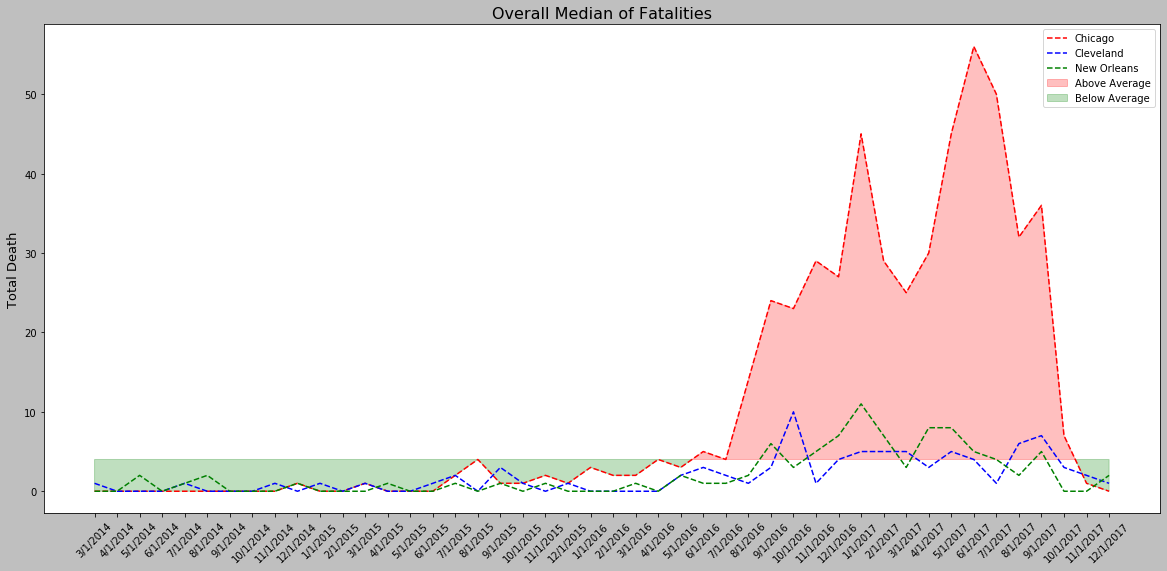

In [20]:
plt.figure(figsize = [20,9])
plt.title('Overall Median of Fatalities', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(Year, Chicago_City_DF, color = 'r', linestyle='--', label='Chicago')
plt.plot(Year, Cleveland_City_DF, color = 'b',linestyle='--', label='Cleveland')
plt.plot(Year, New_Orleans_City_DF, color = 'g',linestyle='--',  label='New Orleans')
plt.xticks(rotation = 45)

overall_median = 4

#for abve average
plt.fill_between(Year,Chicago_City_DF, overall_median, 
                 where=(Chicago_City_DF > overall_median),interpolate=True,color='r',alpha=0.25, label='Above Average')
#for below average
plt.fill_between(Year,Chicago_City_DF, overall_median, 
                 where=(Chicago_City_DF < overall_median),interpolate=True,color='g', alpha=0.25, label='Below Average')
plt.legend()